In [1]:
import numpy as np
import pandas as pd

In [2]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)
x5 = np.random.uniform(0,1,20000)
x6 = np.random.uniform(0,1,20000)
x7 = np.random.uniform(0,1,20000)
x8 = np.random.uniform(0,1,20000)
x9 = np.random.uniform(0,1,20000)
x10= np.random.uniform(0,1,20000)

In [3]:
data = pd.DataFrame([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]).transpose()
data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

In [4]:
data['x1'][5000:10000]=np.random.uniform(-1,2,5000)
data['x3'][5000:10000]=np.random.uniform(-1,2,5000)
data['x5'][5000:10000]=np.random.uniform(-1,2,5000)


In [5]:
data['y'] = 10*np.sin(np.pi*data['x1']*data['x2'])+20*(data['x3']-0.5)**2 + 10*data['x4'] + 5*data['x5'] + np.random.normal(0,1)

In [6]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.040004,0.720121,0.073741,0.295641,0.627283,0.160828,0.362404,0.325155,0.362526,0.895253,11.562620
1,0.170159,0.945305,0.265772,0.520345,0.709903,0.721587,0.253628,0.926060,0.619054,0.319878,15.623263
2,0.175336,0.670993,0.888126,0.013404,0.231887,0.822283,0.762295,0.467680,0.523971,0.538825,8.850862
3,0.857053,0.250495,0.756350,0.078327,0.278441,0.132254,0.061163,0.788707,0.880680,0.160709,10.666620
4,0.134410,0.807402,0.771872,0.514488,0.389598,0.897312,0.698380,0.271916,0.358719,0.958721,12.846895
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.020891,0.993402,0.158884,0.977421,0.469773,0.640188,0.369327,0.412954,0.894250,0.942098,16.033871
19996,0.757509,0.861255,0.896937,0.308230,0.541380,0.587873,0.997060,0.905257,0.875591,0.192600,18.747896
19997,0.818596,0.600055,0.554991,0.260265,0.788029,0.570503,0.895795,0.290404,0.386834,0.019980,17.531518
19998,0.894574,0.437631,0.442976,0.259611,0.040356,0.608487,0.858292,0.853130,0.322427,0.491499,13.219583


In [7]:
data.to_csv('friedman_with_4_gradual_drift.csv', index=False)

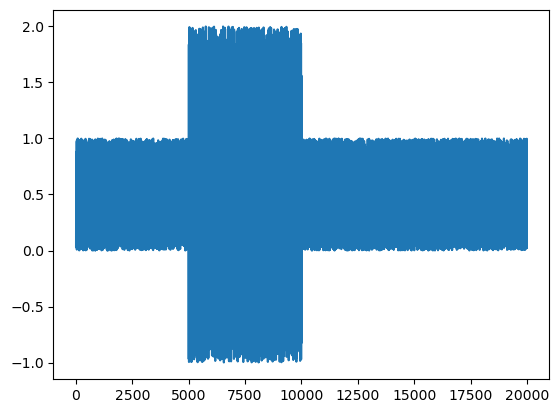

In [8]:
import matplotlib.pyplot as plt
plt.plot(data['x1'])

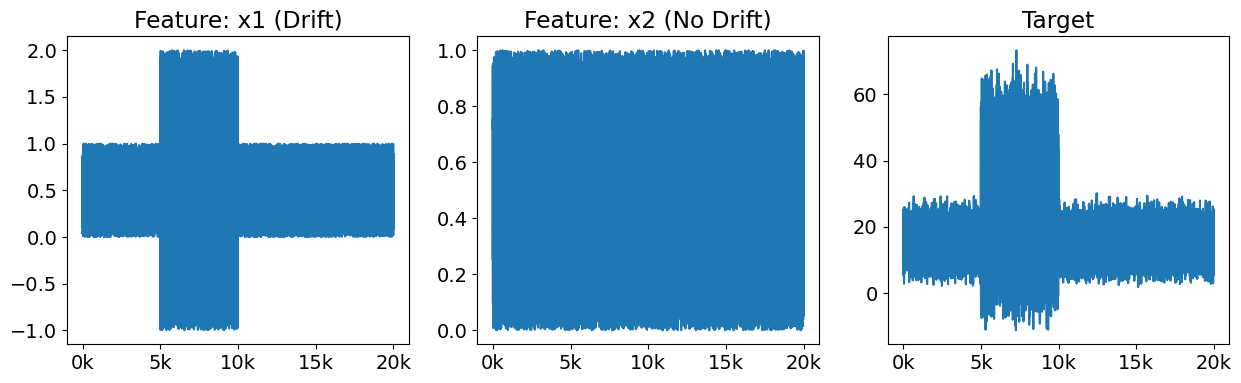

In [9]:
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)
fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x1'])
ax[0].set_title('Feature: x1 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[1].plot(data['x2'])
ax[1].set_title('Feature: x2 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[2].plot(data['y'])
ax[2].set_title('Target')
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('friedman_incremental.png', bbox_inches='tight', dpi=300)

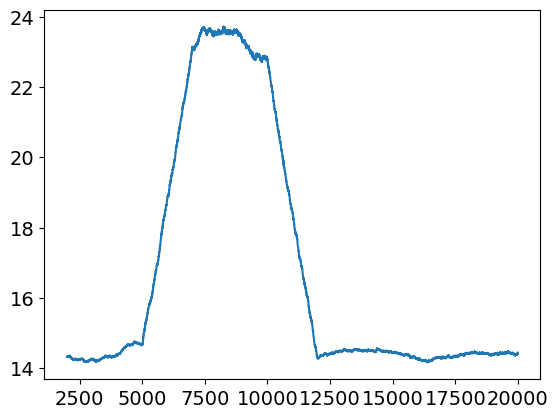

In [33]:
import matplotlib.pyplot as plt
plt.plot(data['y'].rolling(window=2000).mean())